In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [7]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [8]:
print (y_test)

[7 2 1 ..., 4 5 6]


In [9]:
X_train = X_train.reshape(X_train.shape[0], -1).T

In [10]:
print(X_train.shape)

(784, 60000)


In [11]:
X_test = X_test.reshape(X_test.shape[0], -1).T

In [12]:
print(X_test.shape)

(784, 10000)


In [13]:
Y_train = np.zeros((10,X_train.shape[1]))

In [14]:
print(Y_train.shape)

(10, 60000)


In [15]:
Y_test = np.zeros((10,X_test.shape[1]))

In [16]:
print(Y_test.shape)

(10, 10000)


In [17]:
m_train = X_train.shape[1]
m_test = X_test.shape[1]
for i in range(m_train):
    Y_train[y_train[i], i] = 1
for i in range(m_test):
    Y_test[y_test[i], i] = 1

In [18]:
print(Y_train.shape,Y_test.shape)

(10, 60000) (10, 10000)


In [19]:
print(X_train[100])

[0 0 0 ..., 0 0 0]


In [20]:
X_train = X_train/255

In [21]:
X_test = X_test/255

In [22]:
np.random.seed(2303)

In [23]:
def initialize_params(layer_dims):
    L = len(layer_dims)
    parameters = {}
    for l in range(1,L):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [24]:
def sigmoid(I):
    O = 1/(1+np.exp(-I))
    return O
def relu(I):
    O = np.maximum(0,I)
    return O

In [25]:
lala = np.array([5,-4,3])
print(sigmoid(lala))
print(relu(lala))

[ 0.99330715  0.01798621  0.95257413]
[5 0 3]


In [26]:
def linear_act_fwd(A_prev,W,b,act):
    
    Z = np.dot(W,A_prev)+b
    
    if act=="sigmoid":
        A = sigmoid(Z)
    elif act=="relu":
        A = relu(Z)
        
    return A,Z

In [39]:
def forward_L(X, parameters):
    L = len(parameters)//2
    prev_res = {}
    A = X
    for l in range(1,L):
        W = parameters["W"+str(l)]
        b = parameters["b"+str(l)]
        A,Z = linear_act_fwd(A,W,b,"relu")
        prev_res["Z"+str(l)] = Z
        prev_res["A"+str(l)] = A
    
    W = parameters["W"+str(L)]
    b = parameters["b"+str(L)]
    A,Z = linear_act_fwd(A,W,b,"sigmoid")
    prev_res["Z"+str(L)] = Z
    prev_res["A"+str(L)] = A
    prev_res["A0"] = X
    
    return A,prev_res

In [69]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    return cost

In [41]:
def sig_der(Z):
    return sigmoid(Z)*(1-sigmoid(Z))

In [42]:
def relu_der(Z):
    return 1*(Z>0)

In [43]:
np.array(relu_der(np.array([-1,2,3])))

array([0, 1, 1])

In [44]:
def backward_L(AL,Y,parameters,prev_res):
    grads = {}
    L = len(parameters)//2
    m = Y.shape[1]
    dAL = -(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    #Lth layer now
    W = parameters["W"+str(L)]
    b = parameters["b"+str(L)]
    A = prev_res["A"+str(L-1)]
    Z = prev_res["Z"+str(L)]
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = linear_act_bkd(dAL,W,b,A,Z,"sigmoid")
    
    #L-1th to 1st layer
    for l in range(L-1,0,-1):
        W = parameters["W"+str(l)]
        b = parameters["b"+str(l)]
        A = prev_res["A"+str(l-1)]
        Z = prev_res["Z"+str(l)]
        grads["dA"+str(l-1)],grads["dW"+str(l)],grads["db"+str(l)] = linear_act_bkd(grads["dA"+str(l)],W,b,A,Z,"relu")
        
    return grads

In [49]:
def linear_act_bkd(dA,W,b,A,Z,act):
    if act == "sigmoid":
        dZ = dA*sig_der(Z)
    elif act=="relu":
        dZ = dA*relu_der(Z)
        
    m = A.shape[1]
    dW = (1/m)*np.dot(dZ,A.T)
    db = (1/m)*np.sum(dZ,axis = 1,keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev,dW,db

In [46]:
def update_params(parameters,grads,alpha):
    L = len(parameters)//2
    for i in range(1,L+1):
        parameters["W"+str(i)] = parameters["W"+str(i)] - alpha*grads["dW"+str(i)]
        parameters["b"+str(i)] = parameters["b"+str(i)] - alpha*grads["db"+str(i)]        
    return parameters

In [70]:
def NN_model(X,Y,layer_dims,alpha,num_iters):
    np.random.seed(2303)
    costs = []
    parameters = initialize_params(layer_dims)
    for i in range(0,num_iters):
        AL,prev = forward_L(X,parameters)
       # print(parameters)
        cost = compute_cost(AL,Y)
        grads = backward_L(AL,Y,parameters,prev)
       # print(grads["dW2"])
        update_params(parameters,grads,alpha)
        if i%10==0:
            print("Cost after iteration %i:%f"%(i,cost))
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    
    return parameters

Cost after iteration 0:6.931926
Cost after iteration 10:5.289330
Cost after iteration 20:3.371071
Cost after iteration 30:3.359108
Cost after iteration 40:3.351341
Cost after iteration 50:3.343026
Cost after iteration 60:3.333081
Cost after iteration 70:3.320102
Cost after iteration 80:3.302241
Cost after iteration 90:3.276853
Cost after iteration 100:3.240430
Cost after iteration 110:3.189026
Cost after iteration 120:3.119971
Cost after iteration 130:3.033523
Cost after iteration 140:2.932564
Cost after iteration 150:2.820571
Cost after iteration 160:2.700069
Cost after iteration 170:2.573966
Cost after iteration 180:2.446747
Cost after iteration 190:2.324026
Cost after iteration 200:2.210650
Cost after iteration 210:2.109089
Cost after iteration 220:2.019385
Cost after iteration 230:1.940073
Cost after iteration 240:1.869227
Cost after iteration 250:1.805098
Cost after iteration 260:1.746318
Cost after iteration 270:1.691917
Cost after iteration 280:1.641269
Cost after iteration 290:

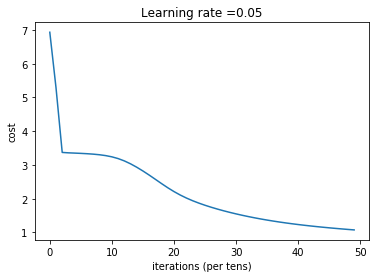

In [71]:
parameters = NN_model(X_train, Y_train, [28*28, 20, 10],0.05, 500)

In [76]:
def predict(X,Y,parameters):
    AL,prev = forward_L(X,parameters)
    AL = (AL == AL.max(axis=0))*1
    ac = np.sum(np.logical_and(AL,Y))
    m = Y.shape[1]
    print(100*(ac/m))

In [80]:
predict(X_test,Y_test,parameters)

87.24
